# Übung 8 - JobPosts Similarity (Ansatz 1)


1. Implementation of Tf-id-vectors
2. Implementation of cosine-simiarity
3. Ranking (not implemented yet)
4. Topic modelling (not implemented yet)

####  1. Imports

In [158]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

#### 2. Load Dataset
Loading the dataset: "data_scientist_united_states_job_postings_jobspikr.xlsx"

In [159]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
df = pd.read_excel("./data_scientist_united_states_job_postings_jobspikr.xlsx")
df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 06:26:22,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 06:33:41,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 06:33:35,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 06:33:42,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 06:48:23,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 02:55:15,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>_x000D_\n<p><span>Compe...
9996,2019-10-01 02:50:33,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>_x000D_\n<p><span>Locat...
9997,2019-09-26 02:53:10,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 02:41:31,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>_x000D_\n<p><span>Locat...


#### 3. Vectorize documents into tf-idf-vectors
For more Information:
- TfidVectorizer() (scikit learn): https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- sparse.csr_matrix (scipy): https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
- convert matrix to list (scipy): https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.toarray.html#scipy.sparse.csr_matrix.toarray

#### 3.1 Convert pandas Series into array

In [161]:
c = df["category"] #.iloc[0:100] #Change here the sample size
corpus = list(c.dropna())
#corpus

In [6]:
c.isnull().sum()

882

In [7]:
len(corpus)

9118

#### 3.2 Remove digits and special chars
may change

In [162]:
#A small function to remove digits and special chars like: ?, , 
def clean_text(documents):
  nlp = spacy.load("en_core_web_sm")
  new_corpus = []
  for document in documents:
    filler = ""
    doc = nlp(document)
    for token in doc:
      if token.is_alpha:
        filler += " " +  token.text

    new_corpus += [filler[1:len(filler)]]

  return new_corpus

In [163]:
new_corpus = clean_text(corpus)

In [10]:
#new_corpus

#### 3.3 Vectorize documents and words 

In [164]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', use_idf=True, ngram_range=(1,3))
X = vectorizer.fit_transform(new_corpus)
X

<9118x1255 sparse matrix of type '<class 'numpy.float64'>'
	with 36394 stored elements in Compressed Sparse Row format>

In [82]:
X.shape

(9118, 1255)

In [167]:
X_transpose = X.T
X_transpose.shape

(1255, 9118)

In [168]:
tsne = TSNE(n_components=2)
points = tsne.fit_transform(X_transpose.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [169]:
x_data = [x[0] for x in points]
y_data = [y[1] for y in points]

Text(0.5, 1.0, 'Visualization of Tf-id-vectors on feature category (Reshaped)')

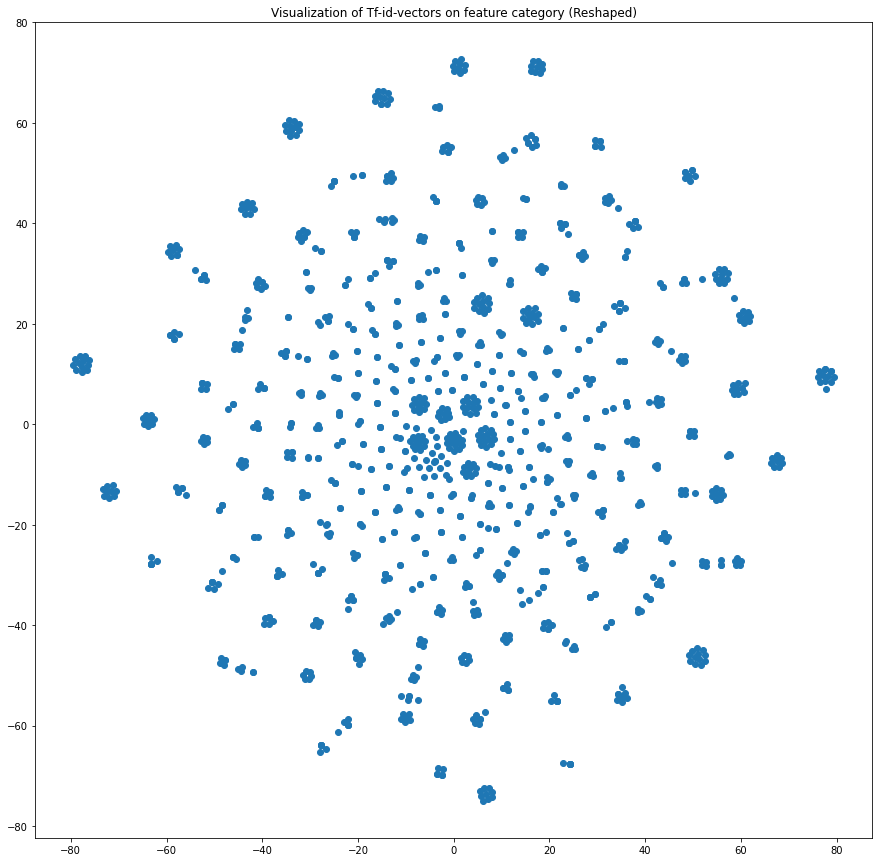

In [170]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(x_data, y_data)
ax.set_title("Visualization of Tf-id-vectors on feature category (Reshaped)")

#### 3.4 Get feature names

In [83]:
names = vectorizer.get_feature_names_out()
names

array(['accounting', 'accounting finance', 'actuarial', ..., 'zo',
       'zo closing', 'zo closing service'], dtype=object)

In [14]:
X.toarray().shape, names.shape

((9118, 1255), (1255,))

#### 3.3 Reshaping
Reshaping array shape (100, 3757) to shape (3757, 100) so it more sense for understanding. Rows for each word name and column for each document (here 100 of corpus)

In [15]:
reshaped = X.toarray().reshape(1255, 9118)
#reshaped

#### 4. Check simalirity between vectors with cosine distance

For more Information:
- cosine simalirity (scikit learn) : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity

- Heatmap (matplotlib): https://matplotlib.org/3.4.3/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

#### 4.1 calculate similarities with cosine similarity

In [96]:
matrix = cosine_similarity(reshaped, Y=None)

In [97]:
matrix.shape

(1255, 1255)

#### 4.2 Visualize cosine matrix
For testing only 10 instances

In [98]:
test = matrix[0:10, 0:10]
test.shape

(10, 10)

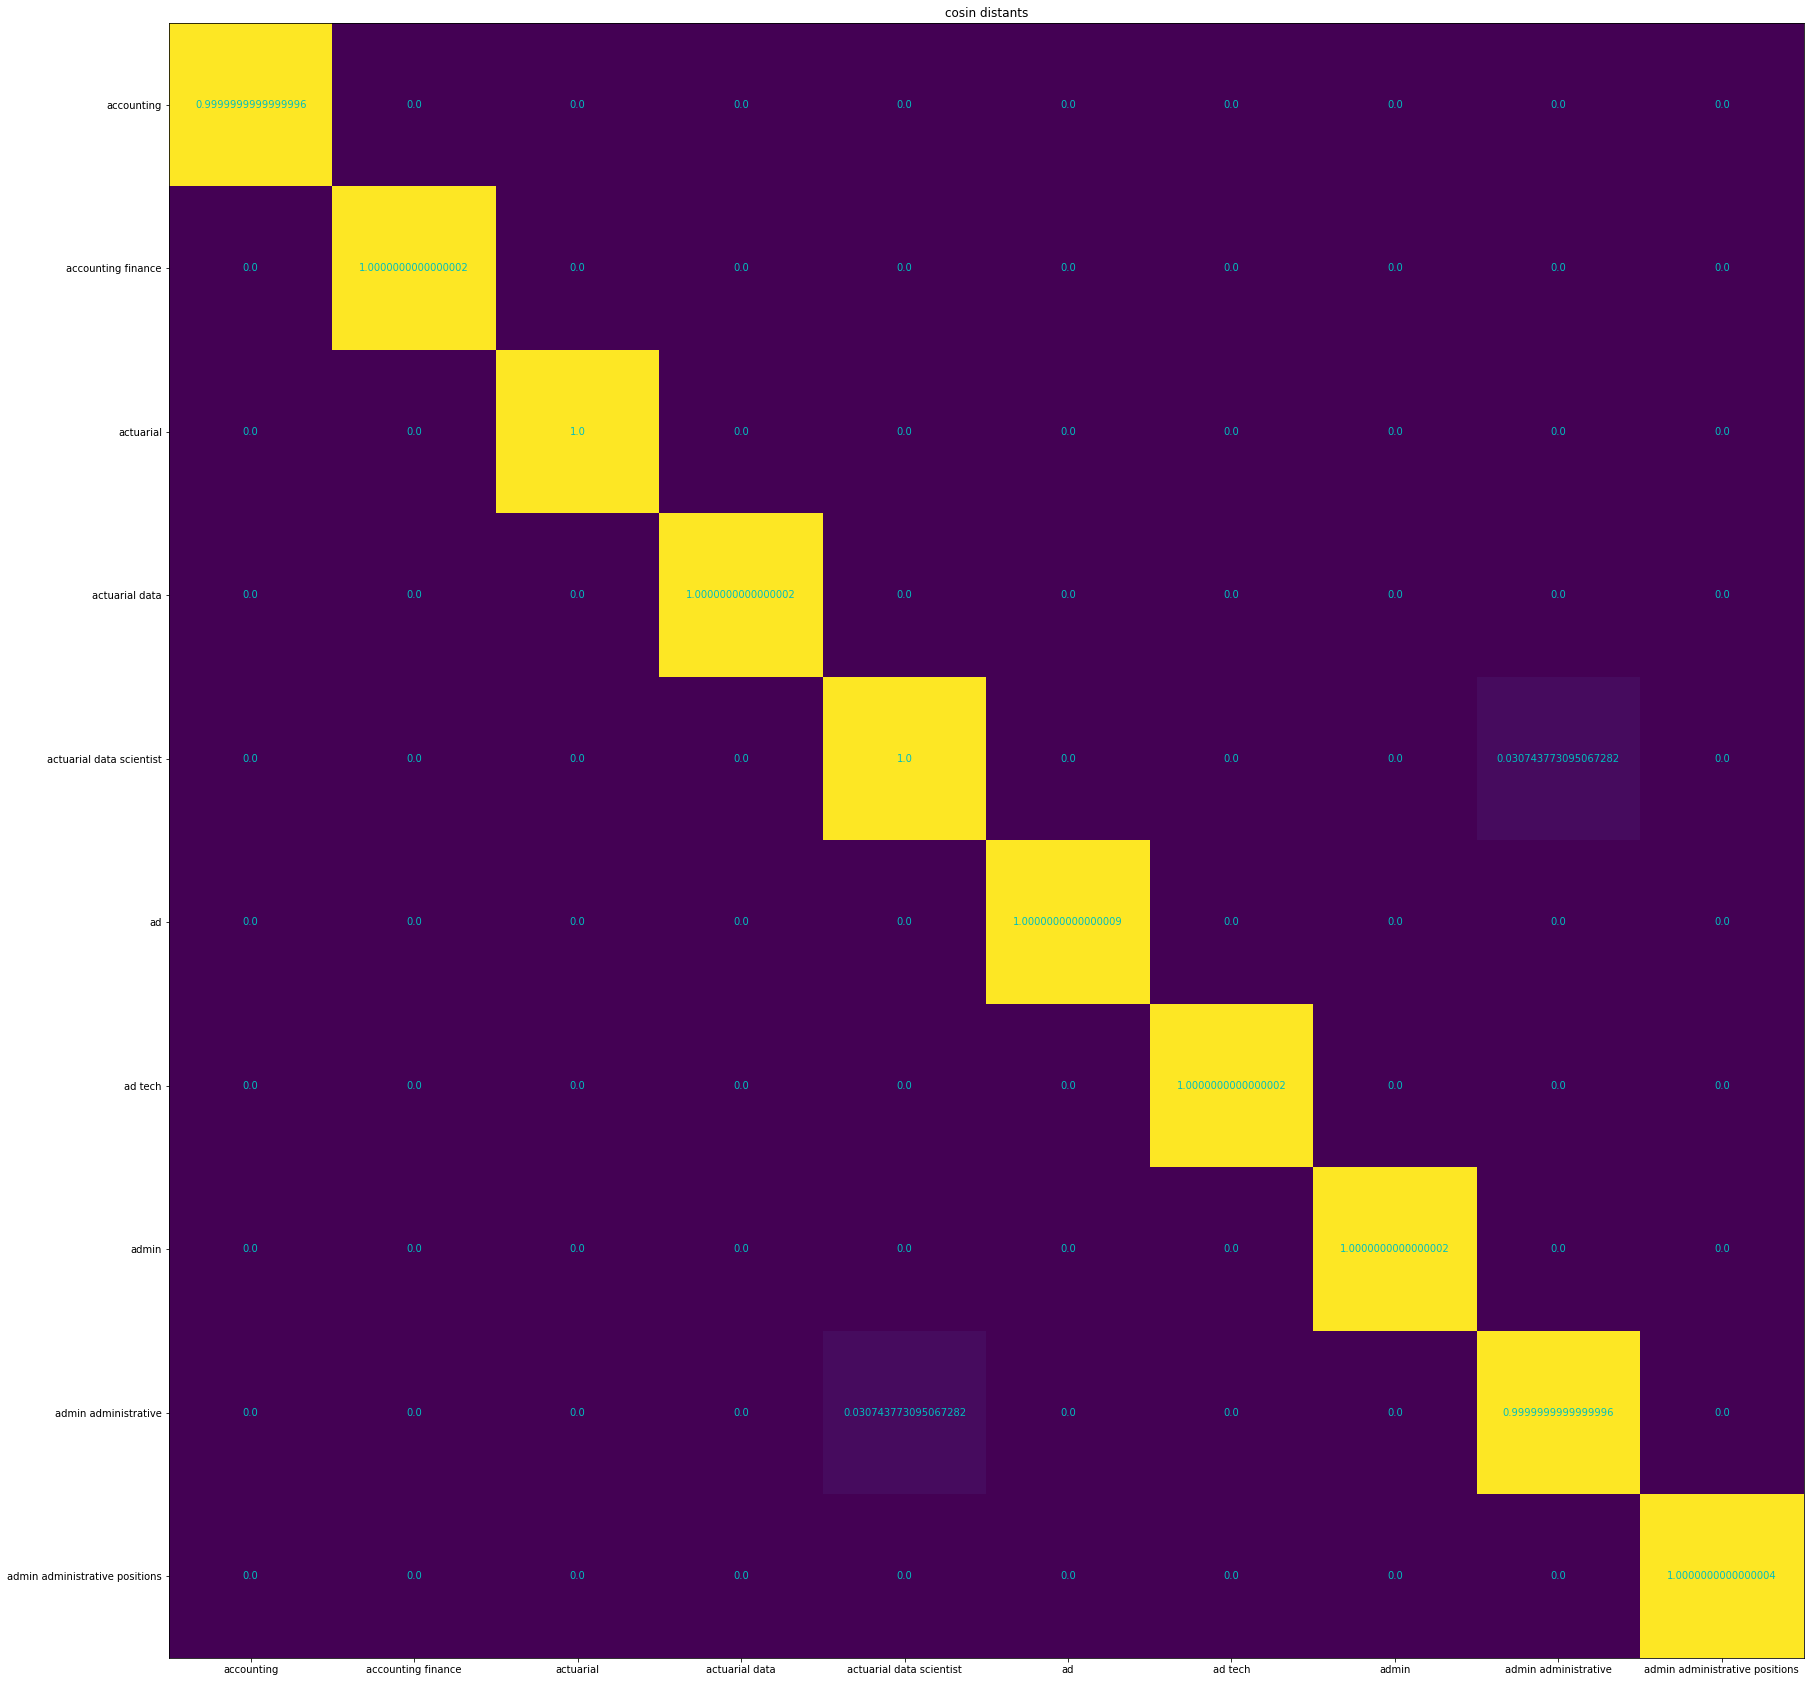

In [99]:
fig = plt.figure(figsize=(25, 25))
ax = plt.axes()
im = ax.imshow(test)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(names[0:10])))
ax.set_yticks(np.arange(len(names[0:10])))

ax.set_xticklabels(names[0:10])
ax.set_yticklabels(names[0:10])


for i in range(len(names[0:10])):
    for j in range(len(names[0:10])):
        text = ax.text(j, i, test[i, j],
                       ha="center", va="center", color="c")
        


ax.set_title("cosin distants")
fig.tight_layout()
plt.show()

#### 4.2 Save Image

In [ ]:
fig.savefig('matrix.png')

#### 5 Clustering of words
See for more information:   
clustering (nltk) - https://www.nltk.org/api/nltk.cluster.html

In [92]:
#input: names (list[str]), labels (list[int]) - Get's a list with names and a list with cluster id's.
#ouput: dic (dictionary) - Returns a dictionary with cluster id's as keys and names as values
#function to match names with cluster labels
def cluster(names, labels):
  dic = {}
  for label in labels:
    if label not in dic:
      dic[label] = []

  for index in range(0, (len(labels))):
    for key in dic:
      if key == labels[index]:
        dic[key] = dic[key] + [names[index]] 
        break

  return dic


#### 5.1 scikit learn kmeans implementation
See for more information:   
kmeans (scikit learn) - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [91]:
kmeans = KMeans(n_clusters=289)
kmeans.fit(X_transpose)
kmeans.labels_

array([ 11,  11, 236, ..., 163, 163, 163], dtype=int32)

In [ ]:
len(kmeans.labels_)

32

In [93]:
topics = cluster(names, kmeans.labels_)

In [94]:
for key in topics:
  print("Cluster: {}".format(key))
  print("Words: {}".format(topics[key]))

Cluster: 11
Words: ['accounting', 'accounting finance', 'finance']
Cluster: 236
Words: ['actuarial', 'actuarial data', 'actuarial data scientist']
Cluster: 201
Words: ['ad', 'ad tech', 'data scientist ad', 'scientist ad', 'scientist ad tech']
Cluster: 235
Words: ['admin']
Cluster: 251
Words: ['admin administrative', 'admin administrative positions', 'administrative positions', 'positions']
Cluster: 162
Words: ['admin admissions', 'admin admissions enrollment', 'admissions', 'admissions enrollment', 'enrollment']
Cluster: 143
Words: ['admin health', 'admin health medical', 'health medical', 'health medical services', 'medical', 'medical services']
Cluster: 286
Words: ['admin information', 'admin information technology', 'information', 'information technology']
Cluster: 89
Words: ['admin institutional', 'admin institutional research', 'institutional', 'institutional research', 'institutional research planning', 'planning', 'research planning']
Cluster: 267
Words: ['admin instructional', 

#### 5.2 nltk implementation
see for more information:
kmeans (nltk) - https://www.nltk.org/api/nltk.cluster.kmeans.html

In [90]:
from nltk import cluster
from nltk.cluster import cosine_distance
kmeans_nltk = cluster.KMeansClusterer(289, cosine_distance, normalise=True, avoid_empty_clusters=True)
nltk_labels = kmeans_nltk.cluster(X_transpose.toarray(), assign_clusters=True)

In [51]:
len(nltk_labels)

1255

In [95]:
topics = cluster(names, nltk_labels)
for key in topics:
  print("Cluster: {}".format(key))
  
  print("Words: {}".format(topics[key]))

Cluster: 281
Words: ['accounting', 'accounting finance', 'finance', 'finance jobs']
Cluster: 0
Words: ['actuarial', 'actuarial data', 'actuarial data scientist', 'ad', 'ad tech', 'administrative support', 'agriculture', 'agriculture fishing', 'alpha', 'alpha insights', 'astrophysics', 'automotive', 'biotech', 'building', 'building maintenance', 'clinical', 'clinical data', 'clinical data scientist', 'communications', 'communications jobs', 'compliance', 'data insights', 'data insights practice', 'data scientist ad', 'data scientist alpha', 'data scientist compliance', 'data scientist enterprise', 'data scientist experienced', 'data scientist fleet', 'data scientist marketing', 'data scientist marketplace', 'data scientist max', 'data scientist oci', 'data scientist principal', 'data scientist provider', 'data scientist sas', 'data scientist stellar', 'data scientist storeconnect', 'data scientist transactions', 'enterprise', 'enterprise networking', 'executive', 'executive jobs', 'expe

#### 5.3 scikit learn Optics implementation
See more Information:   
Optics (scikit learn) - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html

In [84]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=2, metric='cosine')
optics.fit(X_transpose.toarray())
optics.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([  0,   0, 255, ..., 218, 218, 218])

In [85]:
len(optics.labels_)

1255

In [87]:
np.unique(optics.labels_).size

289

In [89]:
topics = cluster(names, optics.labels_)
for key in topics:
  print("Cluster: {}".format(key))
  print("Words: {}".format(topics[key]))

Cluster: 0
Words: ['accounting', 'accounting finance', 'finance']
Cluster: 255
Words: ['actuarial', 'actuarial data', 'actuarial data scientist']
Cluster: 108
Words: ['ad', 'ad tech', 'data scientist ad', 'scientist ad', 'scientist ad tech']
Cluster: 151
Words: ['admin', 'admin laboratory', 'admin laboratory research', 'laboratory', 'laboratory research', 'research']
Cluster: 178
Words: ['admin administrative', 'admin administrative positions', 'administrative positions', 'positions']
Cluster: 184
Words: ['admin admissions', 'admin admissions enrollment', 'admissions', 'admissions enrollment', 'enrollment']
Cluster: 195
Words: ['admin health', 'admin health medical', 'health medical', 'health medical services', 'medical', 'medical services']
Cluster: 33
Words: ['admin information', 'admin information technology', 'information', 'information technology']
Cluster: 152
Words: ['admin institutional', 'admin institutional research', 'institutional', 'institutional research', 'institutional 

#### 5.4 Visualization of Tf-idf-vectors
See for more information:
TSNE (scikit learn) - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [146]:
tsne = TSNE(n_components=2)
points = tsne.fit_transform(X_transpose.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [147]:
points.shape

(1255, 2)

In [148]:
x_data = [x[0] for x in points]
y_data = [y[1] for y in points]

Text(0.5, 1.0, 'Visualization of Tf-id-vectors and nltk kmeans clustering on feature category')

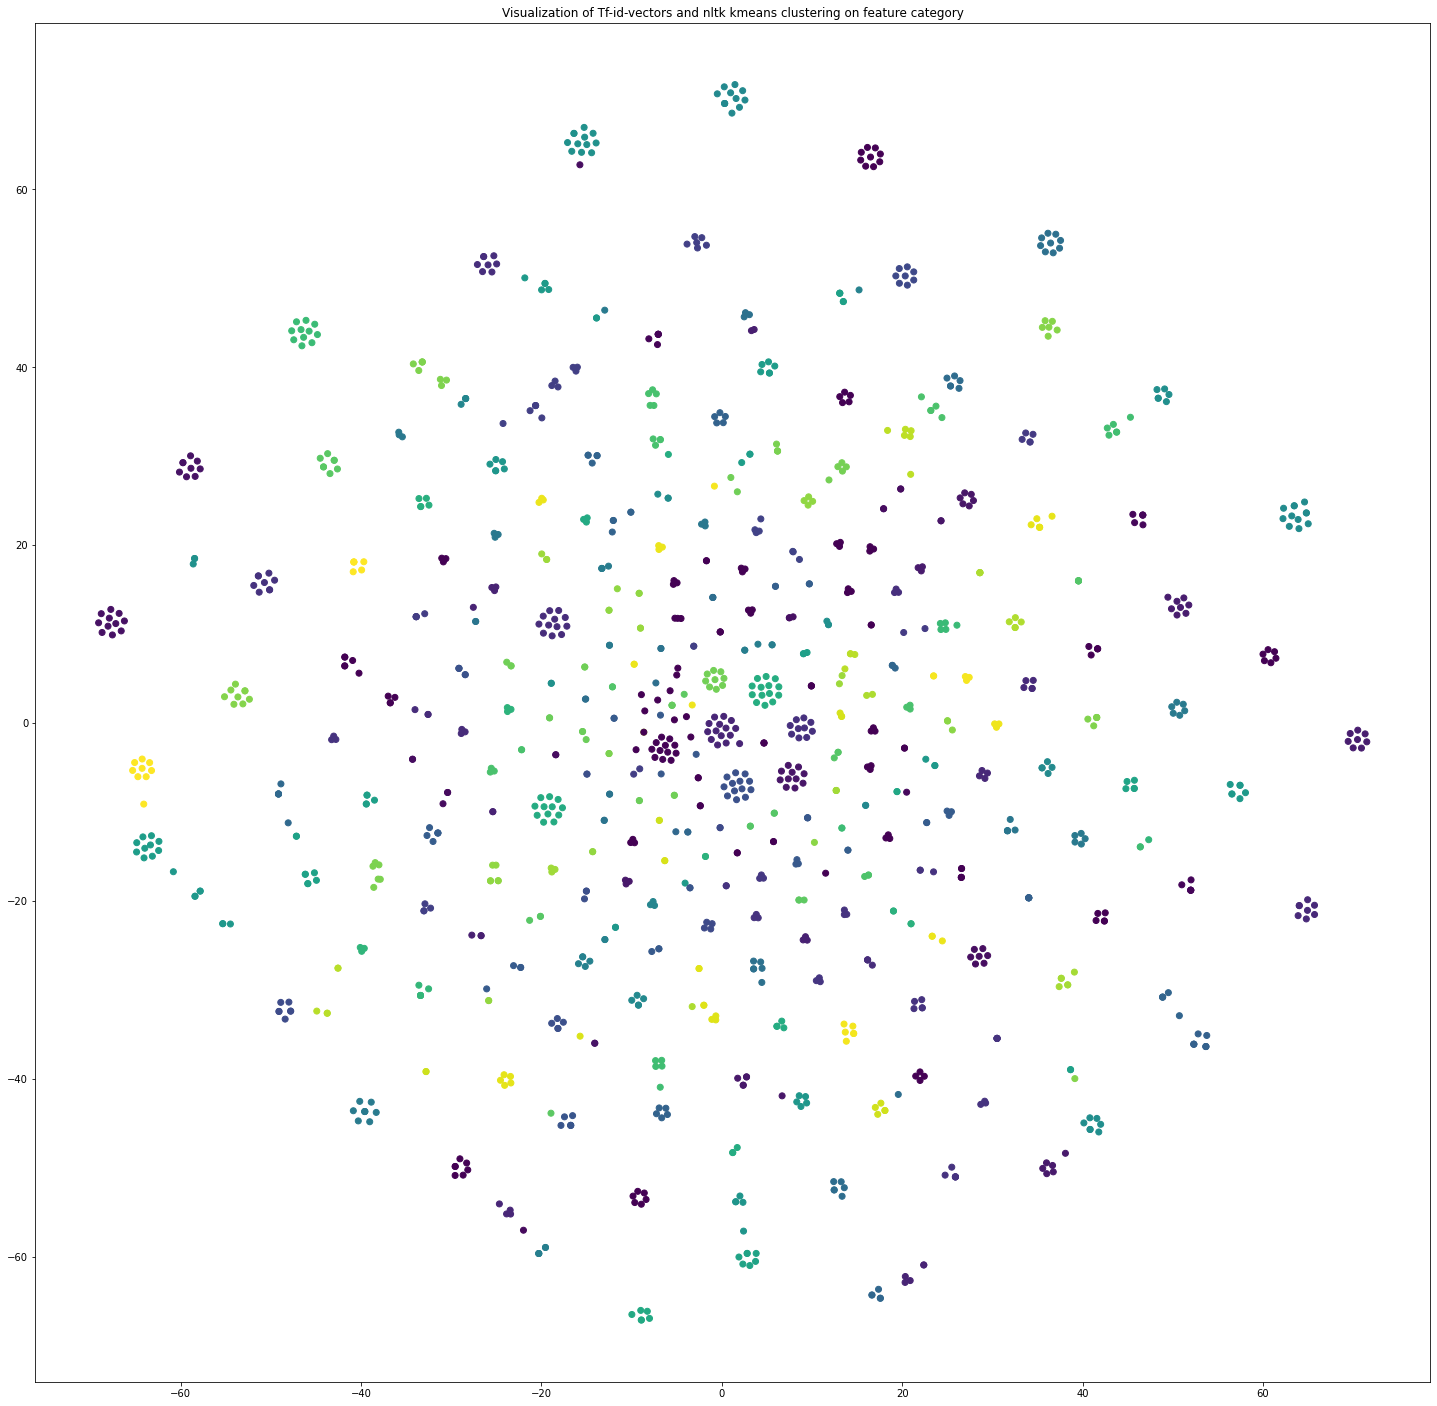

In [152]:
fig = plt.figure(figsize=(25, 25))
ax = plt.axes()
ax.scatter(x_data, y_data, c=nltk_labels)
ax.set_title("Visualization of Tf-id-vectors and nltk kmeans clustering on feature category")

In [153]:
#fig.savefig('category.png')

#### 6 Apply on other Features

#### 6.1 Feature: "state"

In [102]:
s = df["state"] 
corpus_state = list(s.dropna())
#corpus_state

In [103]:
#A small function to remove digits and special chars like: ?, , 
def clean_text2(documents):
  nlp = spacy.load("en_core_web_sm")
  new_corpus = []
  for document in documents:
    filler = ""
    doc = nlp(document)
    for token in doc:
      if token.is_alpha:
        filler += " " +  token.text

    new_corpus += [filler[1:len(filler)]]

  return new_corpus

In [ ]:
new_corpus_state = clean_text2(corpus_state)
#new_corpus_state

In [108]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', use_idf=True, ngram_range=(1,4))
matrix_state = vectorizer.fit_transform(new_corpus_state)
matrix_state

<9584x871 sparse matrix of type '<class 'numpy.float64'>'
	with 14819 stored elements in Compressed Sparse Row format>

In [110]:
names_state = vectorizer.get_feature_names_out()
#names_state

In [112]:
matrix_state.shape, names.shape

((9584, 871), (1255,))

In [111]:
matrix_transpose_state = matrix_state.T
matrix_transpose_state.shape

(871, 9584)

In [115]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=2, metric='cosine')
optics.fit(matrix_transpose_state.toarray())
#optics.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(metric='cosine', min_samples=2)

In [117]:
topics = cluster(names_state, optics.labels_)
for key in topics:
  print("Cluster: {}".format(key))
  print("Words: {}".format(topics[key]))

Cluster: 0
Words: ['adams', 'adams area', 'mount', 'mount adams', 'mount adams area', 'oh mount', 'oh mount adams', 'oh mount adams area']
Cluster: 140
Words: ['afb', 'afb area', 'fl macdill', 'fl macdill afb', 'fl macdill afb area', 'macdill', 'macdill afb', 'macdill afb area']
Cluster: -1
Words: ['al', 'ar', 'area', 'az', 'ca', 'ca north', 'ct', 'dc', 'fl', 'ga', 'hawaii', 'hi', 'ia', 'id', 'idaho', 'il', 'ks', 'ky', 'la', 'louisiana', 'ma', 'massachusetts', 'md', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nn', 'north', 'north area', 'nv', 'ny', 'oh', 'ok', 'pa', 'pr', 'remote', 'ri', 'sc', 'tn', 'tx', 'ut', 'va', 'virginia', 'vt', 'wa', 'wi', 'wv']
Cluster: 153
Words: ['al gorgas', 'al gorgas area', 'gorgas', 'gorgas area']
Cluster: 155
Words: ['alexandria', 'alexandria wrest', 'alexandria wrest area', 'va alexandria', 'va alexandria wrest', 'va alexandria wrest area', 'wrest', 'wrest area']
Cluster: 95
Words: ['alliance', 'alliance area', 'government', 'gove